<a href="https://colab.research.google.com/github/fuu-yaa/Stable-Video-Diffusion/blob/main/stable_video_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   参照 : https://qiita.com/nabata/items/00ae91dbb4a429b092ec



In [1]:
!pip install requests

In [2]:
from google.colab import userdata
userdata.get('API_KEY')

'sk-vJKNZivLHWnIQqGiwV2mOGO1cITqus4UsPBUEzhfpT2eHxUi'

In [3]:
#google driveにマウント、画像のパス取得
from google.colab import drive
drive.mount('/content/drive')
original_image = '/content/drive/MyDrive/動画生成AI-比較/ブルーミーちゃん.jpeg'

Mounted at /content/drive


True

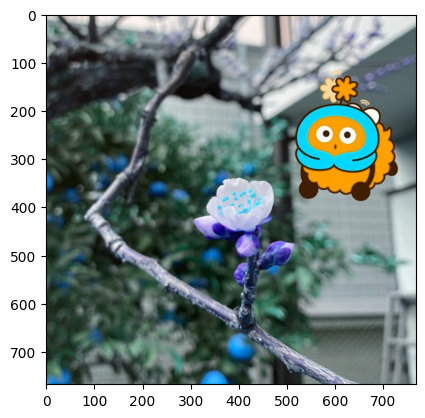

In [4]:
# 画像の形状変換=>（768,768）と、画像の確認
import cv2
img = cv2.imread(original_image)
resized_image = cv2.resize(img, (768,768))
#resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(resized_image)

#リサイズした画像の保存
cv2.imwrite('/content/drive/MyDrive/動画生成AI-比較/resized_image.jpeg', resized_image)

In [3]:
# import cv2
# cv2.imread('/content/drive/MyDrive/動画生成AI-比較/resized_image.jpeg').shape

(768, 768, 3)

In [5]:
import os
os.chdir('drive/MyDrive//動画生成AI-比較')

In [6]:
import requests
import base64
import time

#os.chdir('drive/MyDrive//動画生成AI-比較')
from google.colab import userdata

api_key = userdata.get('API_KEY')
api_host = 'https://api.stability.ai'
original_image = 'resized_image.jpeg'
seed = 0  # シード値(0〜2147483648)
cfg_scale = 1.5  # 画像にどれだけ忠実とするか(0〜10)
motion_bucket_id = 255  # 動画の動きの大きさ(1〜255)

# 生成API呼び出し
params = {
    "seed": seed,
    "cfg_scale": cfg_scale,
    "motion_bucket_id": motion_bucket_id,
}
file = {
    "image": (original_image, open(original_image, 'rb'), 'image/png'),
}
headers = {
        "Authorization": f"Bearer {api_key}"
    }

response = requests.post(
    f"{api_host}/v2alpha/generation/image-to-video",
    headers=headers,
    files=file,
    data=params
)
if response.status_code != 200:  # 失敗
    print(response.json())
    exit()

response_id = response.json()['id']
print(response_id)

# 結果取得API呼び出し 60秒間隔で3度確認
count = 0
while count < 3:
    count += 1
    time.sleep(60)

    headers["accept"] = "application/json"
    response = requests.get(
        f"{api_host}/v2alpha/generation/image-to-video/result/{response_id}",
        headers=headers
    )
    if response.status_code == 200:  # 成功
        # 動画の保存
        with open(f"./{int(time.time())}_seed_{seed}_cs_{cfg_scale}_mbi_{motion_bucket_id}.mp4", "wb") as f:
            f.write(base64.b64decode(response.json()["video"]))
        break
    else:  # 失敗
        print(response.json())

79b0a3b2871c9f687bc6c673e6c741d21ee9a578c391a447e1475b4665dcd2cd


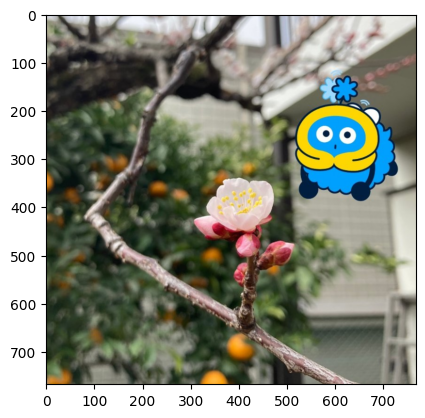

In [8]:
# import cv2
# img = cv2.imread(original_image)
# resized_image = cv2.resize(img, (768,768))
# resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
# import matplotlib.pyplot as plt
# plt.imshow(resized_image)

In [2]:
original_image = '/content/drive/MyDrive/動画生成AI-比較/ブルーミーちゃん.jpeg'
open(original_image, 'rb')

<_io.BufferedReader name='/content/drive/MyDrive/動画生成AI-比較/ブルーミーちゃん.jpeg'>